# 2014222 - Semester 2 CA-01 -April 2024¶

### Github account

https://github.com/2014222-student-cct-ie/2024--Semester-2--CA1

# Part 2

# Step 1: Import Python Libraries

In [1]:
# Utilise Python programming language in order to comply with the requisites of the assessment and perform adequate Machine
# Learning algorithms to discover and deliver insights.

# Import the necessary libraries (Numpy and Pandas) in order to perform data cleansing.
# These are the libraries that are conventionally used as a common practice in order to
# perform mathematical and statistical operations during a data analysis process

import numpy as np
import pandas as pd

# Import Matplotlib and Plotly library in order to perform data visualisation procedures

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# I am using this line of code to see all columns in a wide DataFrame

pd.set_option('display.max_columns', None)

# Using train_test_split and StandardScaler together in a machine learning pipeline
# ensures that the model is trained on a well-prepared dataset,
# leading to better performance and more reliable predictions.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Using Sequential to create a model and Dense for adding layers is a powerful
# and straightforward way to build neural networks in TensorFlow.
# This approach is widely used for a plethora of deep learning tasks where
# complex architectures are not required, providing a great balance between simplicity and functionality.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# I had to install:
#!pip install shap
#!pip install keras-tuner
#!pip install tensorflow
#!pip install --upgrade pip
#pip install keras
#!pip install --upgrade tensorflow

# This combination of imports from TensorFlow and KerasTuner is used to build a neural network model
# (Sequential with Dense layers), optimize its parameters with an efficient optimizer (Adam),
# and fine-tune its hyperparameters (using RandomSearch from KerasTuner)
# to improve performance.
# This process is key to developing high-performing models tailored to specific data sets and tasks.

# from kerastuner.tuners import RandomSearch

from keras_tuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# For a loading the model with Keras

from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dropout

# Import the warnings module

import warnings

# Ignore all warnings by applying th the 'filterwarnings()'' function and passing the 'ignore' argument

warnings.filterwarnings('ignore')

# Step 2: Reading Dataset

In [2]:
# Read the CSV file by applying the pd.read_csv() function.

nba_data = pd.read_csv('NBA Dataset CSV C1.csv')

Reference to the dataset:

https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season=2012-13&SeasonType=Regular%20Season&StatCategory=PTS

# Analyzing the Data

In [3]:
# Print the NBA table dataframe

nba_data

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2012-13,Regular%20Season,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,1433,0.510,139,334,0.416,679,750,0.905,46,594,640,374,116,105,280,143,2280,2462,1.34,0.41
1,2012-13,Regular%20Season,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,1595,0.463,132,407,0.324,525,626,0.839,66,367,433,469,106,25,287,173,2133,1921,1.63,0.37
2,2012-13,Regular%20Season,2544,3,LeBron James,1610612748,MIA,76,2877,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036,2446,2.44,0.57
3,2012-13,Regular%20Season,201935,4,James Harden,1610612745,HOU,78,2985,585,1337,0.438,179,486,0.368,674,792,0.851,62,317,379,455,142,38,295,178,2023,1872,1.54,0.48
4,2012-13,Regular%20Season,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,1489,0.449,157,414,0.379,425,512,0.830,134,326,460,171,52,32,175,205,1920,1553,0.98,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,2021-22,Playoffs,1629006,206,Josh Okogie,1610612750,MIN,1,2,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00
7289,2021-22,Playoffs,1630556,206,Kessler Edwards,1610612751,BKN,2,7,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,1,1,0,1,3,0,1,1.00,1.00
7290,2021-22,Playoffs,1630201,206,Malachi Flynn,1610612761,TOR,6,36,0,7,0.000,0,3,0.000,0,0,0.000,2,1,3,3,1,0,1,6,0,-1,3.00,1.00
7291,2021-22,Playoffs,202693,206,Markieff Morris,1610612748,MIA,2,3,0,1,0.000,0,0,0.000,0,0,0.000,0,1,1,0,0,0,1,2,0,-1,0.00,0.00


In [4]:
# Print the dimensions of the NBA DataFrame.

nba_data.shape

(7293, 30)

As we can see that the NBA dataframe contains 7293 rows × 30 columns

In [5]:
# Print the first 5 rows of the NBA dataframe by applying the .head() method,
# This method is will display the top 5 observations of the dataset

nba_data.head()

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,2012-13,Regular%20Season,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,1433,0.510,139,334,0.416,679,750,0.905,46,594,640,374,116,105,280,143,2280,2462,1.34,0.41
1,2012-13,Regular%20Season,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,1595,0.463,132,407,0.324,525,626,0.839,66,367,433,469,106,25,287,173,2133,1921,1.63,0.37
2,2012-13,Regular%20Season,2544,3,LeBron James,1610612748,MIA,76,2877,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036,2446,2.44,0.57
3,2012-13,Regular%20Season,201935,4,James Harden,1610612745,HOU,78,2985,585,1337,0.438,179,486,0.368,674,792,0.851,62,317,379,455,142,38,295,178,2023,1872,1.54,0.48
4,2012-13,Regular%20Season,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,1489,0.449,157,414,0.379,425,512,0.830,134,326,460,171,52,32,175,205,1920,1553,0.98,0.30


In [6]:
# Print the last 5 rows of the NBA dataframe by applying the .tail() method,
# Will display the last 5 observations of the dataset

nba_data.tail()

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
7288,2021-22,Playoffs,1629006,206,Josh Okogie,1610612750,MIN,1,2,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
7289,2021-22,Playoffs,1630556,206,Kessler Edwards,1610612751,BKN,2,7,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,1,1,0,1,3,0,1,1.0,1.0
7290,2021-22,Playoffs,1630201,206,Malachi Flynn,1610612761,TOR,6,36,0,7,0.0,0,3,0.0,0,0,0.0,2,1,3,3,1,0,1,6,0,-1,3.0,1.0
7291,2021-22,Playoffs,202693,206,Markieff Morris,1610612748,MIA,2,3,0,1,0.0,0,0,0.0,0,0,0.0,0,1,1,0,0,0,1,2,0,-1,0.0,0.0
7292,2021-22,Playoffs,200794,206,Paul Millsap,1610612755,PHI,1,6,0,0,0.0,0,0,0.0,0,0,0.0,0,1,1,1,0,0,0,1,0,2,0.0,0.0


In [7]:
# Getting information about the NBA dataframe by applying the .info() method,
# Will display number of records in each column, data having null or not null, Data type,
# memory usage of the dataset
# helps to understand the data type and information about data

nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7293 entries, 0 to 7292
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         7293 non-null   object 
 1   Season_type  7293 non-null   object 
 2   PLAYER_ID    7293 non-null   int64  
 3   RANK         7293 non-null   int64  
 4   PLAYER       7293 non-null   object 
 5   TEAM_ID      7293 non-null   int64  
 6   TEAM         7293 non-null   object 
 7   GP           7293 non-null   int64  
 8   MIN          7293 non-null   int64  
 9   FGM          7293 non-null   int64  
 10  FGA          7293 non-null   int64  
 11  FG_PCT       7293 non-null   float64
 12  FG3M         7293 non-null   int64  
 13  FG3A         7293 non-null   int64  
 14  FG3_PCT      7293 non-null   float64
 15  FTM          7293 non-null   int64  
 16  FTA          7293 non-null   int64  
 17  FT_PCT       7293 non-null   float64
 18  OREB         7293 non-null   int64  
 19  DREB  

Seems to be no missing values.

This information can be helpful for diagnosing issues with data processing and understanding the structure of the NBA dataset.


# Check for Duplication

In [8]:
# Getting several unique values in each columnan the data description the NBA dataframe
# by applying the .nunique() method,
# Will display continuous and categorical columns in the data.
# Duplicated data can be handled or removed based on further analysis
# helps to understand the data type and information about data

nba_data.nunique()

Year             10
Season_type       2
PLAYER_ID      1386
RANK            537
PLAYER         1382
TEAM_ID          30
TEAM             31
GP               83
MIN            2331
FGM             670
FGA            1210
FG_PCT          483
FG3M            261
FG3A            566
FG3_PCT         379
FTM             428
FTA             517
FT_PCT          539
OREB            285
DREB            590
REB             748
AST             544
STL             165
BLK             175
TOV             289
PF              276
PTS            1449
EFF            1567
AST_TOV         445
STL_TOV         226
dtype: int64

In [9]:
# Identifying null values in the NBA dataframe by applying the .isnull() method,

nba_data.isnull()

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7289,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7290,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7291,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


As we can see the NBA dataframe null values are false, meaning there is not missing values

In [10]:
# Identifying missing values in the NBA dataframe by applying the .isna().sum() methods,
# I am using this to get the number of missing records in each column

nba_data.isnull().sum()

Year           0
Season_type    0
PLAYER_ID      0
RANK           0
PLAYER         0
TEAM_ID        0
TEAM           0
GP             0
MIN            0
FGM            0
FGA            0
FG_PCT         0
FG3M           0
FG3A           0
FG3_PCT        0
FTM            0
FTA            0
FT_PCT         0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
EFF            0
AST_TOV        0
STL_TOV        0
dtype: int64

As we can see the NBA dataframe does not contain any duplicates.

In [11]:
# Identifying the percentage of missing values in the NBA dataframe by applying the .isna().sum() methods,
# I am using this to get the number of missing records in each column

(nba_data.isnull().sum()/(len(nba_data)))* 100

Year           0.0
Season_type    0.0
PLAYER_ID      0.0
RANK           0.0
PLAYER         0.0
TEAM_ID        0.0
TEAM           0.0
GP             0.0
MIN            0.0
FGM            0.0
FGA            0.0
FG_PCT         0.0
FG3M           0.0
FG3A           0.0
FG3_PCT        0.0
FTM            0.0
FTA            0.0
FT_PCT         0.0
OREB           0.0
DREB           0.0
REB            0.0
AST            0.0
STL            0.0
BLK            0.0
TOV            0.0
PF             0.0
PTS            0.0
EFF            0.0
AST_TOV        0.0
STL_TOV        0.0
dtype: float64

As we can see the percentage of missing values for the columns is 0%

In [12]:
# Checking if there any missing or null values in the NBA dataframe by applying the .isna() method,

# and the .sum() method to return the sum of the duplicate values in the whole dataframe.

# The duplicated() method would return a series of 'True' or 'False', based on whether a row contains
# a duplicate value or not. Whereas, by adding the .sum() method, which
# is conventionally used to obtain the sum of a series of values,
# it is possible to obtain the whole sum of all the duplicated
# values contained in the dataframe

nba_data.isna().sum()

Year           0
Season_type    0
PLAYER_ID      0
RANK           0
PLAYER         0
TEAM_ID        0
TEAM           0
GP             0
MIN            0
FGM            0
FGA            0
FG_PCT         0
FG3M           0
FG3A           0
FG3_PCT        0
FTM            0
FTA            0
FT_PCT         0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
EFF            0
AST_TOV        0
STL_TOV        0
dtype: int64

# Step 3: Data Reduction

In [13]:
# Print 10 random records of the NBA table dataframe, by applying the .sample() method
# I want to know which columns or variables can be dropped if they are not useful.

nba_data.sample(10)

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
2664,2015-16,Playoffs,2754,125,Tony Allen,1610612763,MEM,4,94,10,33,0.303,1,7,0.143,9,13,0.692,6,5,11,3,5,2,6,11,30,18,0.50,0.83
6396,2020-21,Playoffs,202683,165,Enes Freedom,1610612757,POR,5,56,4,8,0.500,0,0,0.000,2,2,1.000,6,7,13,0,0,2,3,9,10,18,0.00,0.00
2985,2016-17,Regular%20Season,202335,232,Patrick Patterson,1610612761,TOR,65,1599,154,384,0.401,94,253,0.372,43,60,0.717,62,231,293,76,40,23,38,120,445,592,2.00,1.05
7209,2021-22,Playoffs,1630168,133,Onyeka Okongwu,1610612737,ATL,5,108,9,16,0.563,0,0,0.000,8,10,0.800,11,16,27,2,4,4,4,19,26,50,0.50,1.00
3141,2016-17,Regular%20Season,203526,388,Raul Neto,1610612762,UTA,40,346,41,91,0.451,10,31,0.323,8,9,0.889,4,26,30,34,21,5,15,48,100,124,2.27,1.40
1487,2014-15,Regular%20Season,2561,126,David West,1610612754,IND,66,1895,323,686,0.471,4,20,0.200,119,161,0.739,108,341,449,223,48,48,120,160,769,1012,1.86,0.40
1229,2013-14,Playoffs,2754,71,Tony Allen,1610612763,MEM,7,230,35,72,0.486,0,7,0.000,16,21,0.762,23,31,54,10,12,1,12,23,86,109,0.83,1.00
2669,2015-16,Playoffs,200826,132,J.J. Barea,1610612742,DAL,4,100,11,34,0.324,1,8,0.125,2,2,1.000,0,6,6,20,0,0,11,8,25,17,1.82,0.00
6143,2020-21,Regular%20Season,1628981,452,Bruno Fernando,1610612737,ATL,33,226,18,44,0.409,0,2,0.000,15,22,0.682,16,62,78,10,4,3,21,23,51,92,0.48,0.19
1946,2014-15,Playoffs,202329,93,Al-Farouq Aminu,1610612742,DAL,5,150,17,31,0.548,7,11,0.636,15,19,0.789,14,22,36,6,10,8,6,15,56,92,1.00,1.67


In [14]:
# Converts the column called 'Year' from object to integer by applying the 'astype()' method
# and pass 'int' to represent integers.

nba_data['Year'].str[:4].astype(int)

0       2012
1       2012
2       2012
3       2012
4       2012
        ... 
7288    2021
7289    2021
7290    2021
7291    2021
7292    2021
Name: Year, Length: 7293, dtype: int64

The dataype inside the column called 'Year'  now represents **integers.**

In [15]:
# Now that we converted year to represent integers
# I can create a new column called 'season_start_year'

nba_data['season_start_year'] = nba_data['Year'].str[:4].astype(int)

In [16]:
# Checking if the column season_start_year was successfully created
# by applying the .head() method,

nba_data.head()

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,season_start_year
0,2012-13,Regular%20Season,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,1433,0.510,139,334,0.416,679,750,0.905,46,594,640,374,116,105,280,143,2280,2462,1.34,0.41,2012
1,2012-13,Regular%20Season,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,1595,0.463,132,407,0.324,525,626,0.839,66,367,433,469,106,25,287,173,2133,1921,1.63,0.37,2012
2,2012-13,Regular%20Season,2544,3,LeBron James,1610612748,MIA,76,2877,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036,2446,2.44,0.57,2012
3,2012-13,Regular%20Season,201935,4,James Harden,1610612745,HOU,78,2985,585,1337,0.438,179,486,0.368,674,792,0.851,62,317,379,455,142,38,295,178,2023,1872,1.54,0.48,2012
4,2012-13,Regular%20Season,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,1489,0.449,157,414,0.379,425,512,0.830,134,326,460,171,52,32,175,205,1920,1553,0.98,0.30,2012


As you can see the columns **season_start_year**, was sucessfully created

Note: The **New Orleans Hornets (NOH)** were sold to Tom Benson on **April 13, 2012.**

After purchasing the team, Benson indicated that he wanted **to change the club's nickname** to something more regionally appropriate.

On **December 14, 2012**, it was reported that the Hornets would change their nickname to the **New Orleans Pelicans.**

In [17]:
# Checking the array of the NBA teams by applying the .unique() method,

nba_data.TEAM.unique()

array(['OKC', 'LAL', 'MIA', 'HOU', 'NYK', 'GSW', 'MIL', 'POR', 'TOR',
       'BKN', 'CHA', 'LAC', 'BOS', 'UTA', 'PHI', 'IND', 'SAS', 'ATL',
       'CLE', 'NOH', 'DET', 'CHI', 'SAC', 'DAL', 'DEN', 'MEM', 'PHX',
       'ORL', 'MIN', 'WAS', 'NOP'], dtype=object)

**New Orleans Hornets = (NOH)**

**New Orleans Pelicans = (NOP)**

In [18]:
# Checking the total array of the NBA teams by applying the nunique() method,

nba_data.TEAM.nunique()

31

Create a new standar franchise name for the team New Orleans (NO)

In [19]:
# Standardize the NBA teams.

# Create a new standar franchise name for the team New Orleans

# New Orleans Hornets = (NOH)

# New Orleans Pelicans = (NOP)

nba_data['TEAM'].replace(to_replace=['NOP','NOH'], value='NO', inplace=True)

In [20]:
# Checking the array of the NBA teams by applying the .unique() method,
# with the new New Orleans (NO)

nba_data.TEAM.unique()

array(['OKC', 'LAL', 'MIA', 'HOU', 'NYK', 'GSW', 'MIL', 'POR', 'TOR',
       'BKN', 'CHA', 'LAC', 'BOS', 'UTA', 'PHI', 'IND', 'SAS', 'ATL',
       'CLE', 'NO', 'DET', 'CHI', 'SAC', 'DAL', 'DEN', 'MEM', 'PHX',
       'ORL', 'MIN', 'WAS'], dtype=object)

In [21]:
# Checking the total array of the NBA teams by applying the nunique() method,

nba_data.TEAM.nunique()

30

After standardize the NBA teams.

We can see that now we have **30 teams**

**New Orleans Hornets = (NO)**

In [22]:
# Let's clean and replace the Regular%20Season string that I found on the NBA API url
# Regular Season = RS

nba_data['Season_type'].replace('Regular%20Season','RS', inplace=True)

In [23]:
# Print the first 5 rows of the NBA dataframe by applying the .head() method,
# This method is will display the top 5 observations of the dataset

nba_data.head()

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,season_start_year
0,2012-13,RS,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,1433,0.510,139,334,0.416,679,750,0.905,46,594,640,374,116,105,280,143,2280,2462,1.34,0.41,2012
1,2012-13,RS,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,1595,0.463,132,407,0.324,525,626,0.839,66,367,433,469,106,25,287,173,2133,1921,1.63,0.37,2012
2,2012-13,RS,2544,3,LeBron James,1610612748,MIA,76,2877,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036,2446,2.44,0.57,2012
3,2012-13,RS,201935,4,James Harden,1610612745,HOU,78,2985,585,1337,0.438,179,486,0.368,674,792,0.851,62,317,379,455,142,38,295,178,2023,1872,1.54,0.48,2012
4,2012-13,RS,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,1489,0.449,157,414,0.379,425,512,0.830,134,326,460,171,52,32,175,205,1920,1553,0.98,0.30,2012


Now we can see that the Regular Season = RS

# Creating 2 more data frames:

# 1- Dataframe for Regular Season = regular_season

# 2- Dataframe for Playoffs = playoffs

In [24]:
# Creating Regular Seasons dataframe

regular_season_dataframe = nba_data[nba_data['Season_type']=='RS']


# playoffs_df = data[data['Season_type']=='Playoffs']

In [25]:
# Print the Regular Seasons tables dataframe

regular_season_dataframe

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,season_start_year
0,2012-13,RS,201142,1,Kevin Durant,1610612760,OKC,81,3119,731,1433,0.510,139,334,0.416,679,750,0.905,46,594,640,374,116,105,280,143,2280,2462,1.34,0.41,2012
1,2012-13,RS,977,2,Kobe Bryant,1610612747,LAL,78,3013,738,1595,0.463,132,407,0.324,525,626,0.839,66,367,433,469,106,25,287,173,2133,1921,1.63,0.37,2012
2,2012-13,RS,2544,3,LeBron James,1610612748,MIA,76,2877,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036,2446,2.44,0.57,2012
3,2012-13,RS,201935,4,James Harden,1610612745,HOU,78,2985,585,1337,0.438,179,486,0.368,674,792,0.851,62,317,379,455,142,38,295,178,2023,1872,1.54,0.48,2012
4,2012-13,RS,2546,5,Carmelo Anthony,1610612752,NYK,67,2482,669,1489,0.449,157,414,0.379,425,512,0.830,134,326,460,171,52,32,175,205,1920,1553,0.98,0.30,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,2021-22,RS,1630207,582,Nate Hinton,1610612754,IND,2,2,0,1,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,1,0,0,-2,0.00,0.00,2021
7072,2021-22,RS,1626155,582,Sam Dekker,1610612761,TOR,1,1,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00,2021
7073,2021-22,RS,1629309,582,Trayvon Palmer,1610612765,DET,1,17,0,1,0.000,0,0,0.000,0,0,0.000,0,2,2,0,0,0,1,2,0,0,0.00,0.00,2021
7074,2021-22,RS,1629788,582,Tyler Hall,1610612752,NYK,1,2,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00,2021


As we can see that the Regular Season dataframe contains 5148 rows × 29 columns

In [26]:
# Creating Playoffs dataframe

playoffs_dataframe = nba_data[nba_data['Season_type']=='Playoffs']

In [27]:
# Print the Playoffs dataframe tables dataframe

playoffs_dataframe

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,season_start_year
468,2012-13,Playoffs,2544,1,LeBron James,1610612748,MIA,23,960,212,432,0.491,36,96,0.375,136,175,0.777,37,156,193,152,41,18,70,43,596,671,2.17,0.59,2012
469,2012-13,Playoffs,2225,2,Tony Parker,1610612759,SAS,21,765,167,365,0.458,11,31,0.355,87,112,0.777,14,54,68,146,24,3,53,26,432,397,2.75,0.45,2012
470,2012-13,Playoffs,1495,3,Tim Duncan,1610612759,SAS,21,735,151,321,0.470,0,1,0.000,79,98,0.806,54,160,214,40,18,34,42,53,381,456,0.95,0.43,2012
471,2012-13,Playoffs,202331,4,Paul George,1610612754,IND,19,780,119,277,0.430,34,104,0.327,93,128,0.727,16,125,141,96,25,9,75,72,365,368,1.28,0.33,2012
472,2012-13,Playoffs,2548,5,Dwyane Wade,1610612748,MIA,22,782,144,315,0.457,1,4,0.250,60,80,0.750,38,64,102,105,38,23,58,45,349,368,1.81,0.66,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,2021-22,Playoffs,1629006,206,Josh Okogie,1610612750,MIN,1,2,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,0,0,0,0,0.00,0.00,2021
7289,2021-22,Playoffs,1630556,206,Kessler Edwards,1610612751,BKN,2,7,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,1,1,0,1,3,0,1,1.00,1.00,2021
7290,2021-22,Playoffs,1630201,206,Malachi Flynn,1610612761,TOR,6,36,0,7,0.000,0,3,0.000,0,0,0.000,2,1,3,3,1,0,1,6,0,-1,3.00,1.00,2021
7291,2021-22,Playoffs,202693,206,Markieff Morris,1610612748,MIA,2,3,0,1,0.000,0,0,0.000,0,0,0.000,0,1,1,0,0,0,1,2,0,-1,0.00,0.00,2021


As we can see that the Regular Season dataframe contains 2145 rows × 29 columns

# NBA Glossary

In order to understand better the NBA dataset columns, here is the Glossary

https://www.nba.com/stats/help/glossary

There are columns that are totals, ratios, or percentages.

Example:

The column called **Field Goals Attempted (FGA)** is a total.

The column called **Field Goal Percentage (FG_PCT)** is the result of two attempts.

I want to create a list of the correct columns to use and conduct a group by.

**Glossary:**

**Year:** The NBA season year.

**Season_type:** Type of the season (e.g., Regular Season).

**PLAYER_ID:** A unique identifier for each player.

**RANK:** Ranking of players based on a specific metric.

**PLAYER:** Player's name.

**TEAM_ID:** A unique identifier for each team.

**TEAM:** Team's abbreviation.

**GP:** Games Played.

**MIN:** Minutes Played.

**FGM, FGA, FG%:** Field Goals Made, Attempted, and Percentage.

**3PM, 3PA, 3P%:** Three-Point Field Goals Made, Attempted, and Percentage.

**FTM, FTA, FT%:** Free Throws Made, Attempted, and Percentage.

**OREB, DREB, REB:** Offensive, Defensive, and Total Rebounds.

**AST:** Assists.

**STL:** Steals.

**BLK:** Blocks.

**TOV:** Turnovers.

**PF:** Personal Fouls.

**PTS:** Points.

**EFF:** Efficiency rating.

**AST_TOV:** Assist to Turnover Ratio.

**STL_TOV:** Steals to Turnover Ratio.

In [28]:
# Printing NBA data columns

nba_data.columns

Index(['Year', 'Season_type', 'PLAYER_ID', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM',
       'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'EFF', 'AST_TOV', 'STL_TOV', 'season_start_year'],
      dtype='object')

# Training the model: Feedforward Neural Network (FNN)

## Step 1: Preprocessing

I am going to implement **Feedforward Neural Network (FNN)** to predict player performance efficiency (EFF) based on other statistics. 

The model will predict the efficiency (EFF) of NBA players based on their season statistics. 

## Selecting the features for the model and preparing the data.

In [29]:
# Selecting features and target

# This line chooses the features (independent factors) that will be used to guess how well a player will do.
# Some of the player statistics that were picked are minutes played (MIN), field goals made (FGM),
# field goals attempted (FGA), field goal percentage (FG_PCT), and more.
# It is likely that these factors have something to do with how well a player does, 
# which makes them good choices for adding to the model.

features = nba_data[['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]

# Specifying the target variable, which is the player efficiency (EFF) I am aiming to predict.
# This is the dependent variable in the model I want to create.

target = nba_data['EFF']

# Splitting the dataset into training and testing sets
# This line splits the dataset into training and testing sets.
# The train_test_split function from sklearn.model_selection is used to randomly partition the dataset,
# with 80% of the data going into the training set (both features and target) and 20% into the testing set.
# The random_state=42 ensures reproducibility of the results by seeding the random number generator.

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Normalizing the features

# This creates an instance of StandardScaler from sklearn.preprocessing.
# The scaler will be used to standardize (normalize) the features by removing the mean and
# scaling to unit variance.
# This is an important step because neural networks perform better when the input features are on a similar scale.

scaler = StandardScaler()

# This line applies the scaling transformation to the training data.
# The fit_transform method first computes the mean and standard deviation of each feature on the training set,
# then applies the transformation (subtracting the mean from each feature and dividing by the standard deviation)
# to scale the features. This fitting process is only done on the training data to avoid data leakage
# from the test set.

X_train_scaled = scaler.fit_transform(X_train)

# Finally, the same transformation (computed from the training data) is applied to the test data features.
# It's crucial to use only the transformation parameters from the training data to ensure 
# the model's evaluation on the test set is fair and simulates making predictions on unseen data accurately.

X_test_scaled = scaler.transform(X_test)

## Step 2: Building the Model

I am building the **Feedforward Neural Network (FNN)** using TensorFlow and Keras.

In [30]:
# Determine the number of input features

# This line calculates the number of input features for the neural network.
# X_train_scaled.shape[1] retrieves the number of columns in the X_train_scaled array,
# which corresponds to the number of features in the NBA dataset that the model will use as inputs.
# It's essential to know the number of features because this will dictate the input layer's size
# in the neural network model.

n_features = X_train_scaled.shape[1]

# Building the model

# This block defines the neural network using Keras's Sequential model,
# which is a linear stack of layers. I am building a model with the following layers:

# First Dense Layer: This is the input layer of the network, consisting of 64 neurons and
# using the ReLU (rectified linear unit) activation function.
# The input_shape parameter is set to (n_features,), which tells the model
# how many input features to expect and is crucial for correctly shaping the data passing through the network.

# Second Dense Layer: Another layer with 64 neurons, also using the ReLU activation function. 
# This layer serves to further process the data from the input layer, adding depth to the model.

# Output Layer: A single neuron with no activation function (linear activation, by default).
# This layer is designed to produce a single continuous output value,
# which in this case is the predicted player efficiency (EFF).

model = Sequential([
    Dense(64, activation='relu', input_shape=(n_features,)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model

# This line prepares the model for training. Here’s what each parameter means:

# Optimizer ('adam'): This specifies the method used to update weights in the network.
# Adam is an adaptive learning rate optimization algorithm that has become the standard for
# training deep neural networks because it combines the best properties of the AdaGrad and RMSProp algorithms
# to provide an optimization that can handle sparse gradients on noisy problems.


# Loss ('mean_squared_error'): This loss function used to evaluate how well the model is performing during training.
# Mean squared error (MSE) is a common choice for regression problems, 
# measuring the average of the squares of the errors—that is,
# the average squared difference between the estimated values and the actual value.

# This setup is typical for a regression problem where we are predicting a single continuous variable,
# such as player efficiency.
# The use of The ReLU (Rectified Linear Unit) activation functions helps prevent
# the vanishing gradient problem during
# training, and the Adam optimizer is effective across a wide range of problems.

model.compile(optimizer='adam', loss='mean_squared_error')

## Step 3: Training the Model

I am training the model with our training data.

In [31]:
# The model.fit() function, is used for training the Feedforward Neural Network (FNN) on the NBA dataset.
# This step is crucial as it involves actual learning from the data,
# optimizing the model's weights to predict player efficiency accurately.

# X_train_scaled: This is the set of feature data that I am using to train the model.
# The data has been scaled, meaning each feature has been normalized to ensure no single
# feature dominates the input to the model due to its scale.
#This normalization helps improve the convergence during training and the overall performance of the model.

# y_train: This represents the target variable, which in this case is the efficiency (EFF) of NBA players.
# It is what the model is trying to predict, and it's used by the model to learn the mapping from
# the input features to the output.

# epochs=100: This parameter specifies the number of times the learning algorithm will work through
# the entire training dataset.
# One epoch means that each sample in the training set has had an opportunity to update
# the model's internal parameters.
# A higher number of epochs can lead to a better-fitting model, but also to the risk of overfitting if too high.

# batch_size=32: This defines the number of samples that will be propagated through the network at one time.
# Each batch of 32 samples will be used to calculate model error and update model coefficients.
# Using batches is a more efficient computational practice than passing through one sample at a time because
# it helps to average out noise and leads to a more stable gradient descent process.

# validation_split=0.1: This parameter tells the model to set aside 10% of the training data as a validation set.
# This validation set is not used to train the model but to evaluate its performance after each epoch.
# It helps monitor the model's performance on unseen data,
# providing feedback on how well the model is generalizing, helping detect overfitting early during training.

model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - loss: 364633.6562 - val_loss: 48350.5000
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 28960.2754 - val_loss: 18102.9336
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 16215.7236 - val_loss: 11703.1221
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 10802.4941 - val_loss: 8590.7373
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 8306.9492 - val_loss: 6959.2437
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 6421.1401 - val_loss: 5671.0342
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 5676.3579 - val_loss: 4695.0791
Epoch 8/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 4506.9980 - val_loss: 3955.8870
Epoch 9/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 3631.5261 - val_loss: 3104.6978
Epoch 10/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 3090.6865 - val_loss: 2413.8486
Epoch 11/100
165/165 ━━━━━━━━━━━━━━━━━━━━

## Step 4: Evaluating the Model

I am evaluating the model's performance on the test set.

In [32]:
# X_test_scaled: This is the set of feature data from your test set that has been scaled using
# the same scaling transformation (e.g., StandardScaler) applied to the training data.
# It's crucial that the test data undergoes the exact same preprocessing steps as the training data
# to ensure the model evaluations are fair and meaningful.
# This data represents new, unseen examples that the model did not encounter during the training process.

# y_test: This is the actual set of target values corresponding to X_test_scaled.
# These are the true values of the player efficiency (EFF) that your model attempts to predict.
# The model's predicted values for these test examples will be
# compared against y_test to compute the performance metrics.

# Evaluating the model with model.evaluate is a critical step in the machine learning workflow
# as it provides the final verdict on model performance before the model is deployed or used
# for making decisions based on its predictions.


model.evaluate(X_test_scaled, y_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - loss: 20.0932


20.697877883911133

In [33]:
# Save the trained Keras model
# model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Save the entire model to a keras file.
# The .h5 extension indicates that the model should be saved to HDF5.
# Creates a keras file 'my_nba_predictions_model.keras'

model.save('new_my_nba_predictions_model.keras')

### Output Breakdown from evaluating the model:

**46/46:** This indicates the number of batches that the model processed during the evaluation phase.

**0s 201us/step:** This part is telling about the computational efficiency of the evaluation:

**0s:** It took less than a second to evaluate all the batches, which suggests a fast evaluation process.

**201us/step:** On average, each batch took about 201 microseconds to process. This is a measure of how long it takes to compute the loss for each batch. It's quite fast, indicating good performance of your computing setup for this task.

**loss: 20.9982:** This is the primary output of interest. It represents the loss calculated over the entire test set. Since the model was compiled with the mean squared error (MSE) as the loss function, this value (20.9982) is the MSE for the test data.

**20.309772491455078:** This is an additional output possibly indicating the final loss value reported by the .evaluate() function.

It slightly differs from the in-step reported loss, likely because this value is a more accurate or finalized computation of the loss across all test data after the last batch was processed.

The reason for the slight discrepancy could be rounding differences or minor computational variations as the batches were processed.

# Results

Figuring out how the model worked after testing it can be made easier by illustrating the outcomes.

To see and understand the Feedforward Neural Network (FNN) results after training and testing


## 1. Plotting Training vs. Validation Loss

Visualizing the training and validation loss over epochs can help identify if the model is overfitting, underfitting, or if there's an optimal point to stop training.

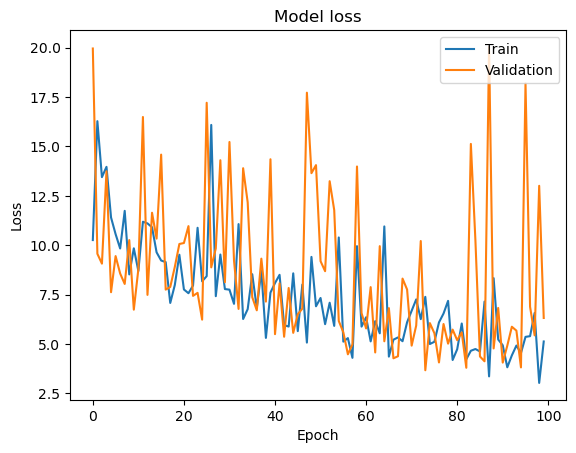

In [34]:
# Plot training & validation loss values

# model.fit(): This is the function used to train the model.
# It adjusts the model weights to minimize the loss function over several iterations (epochs) of the training data.

# X_train_scaled: The input features that have been scaled.
# Scaling ensures that the model does not become biased or sensitive to the scale of features.

# y_train: The target output values that the model is trying to predict, in this case,
#the efficiency (EFF) of NBA players.

# epochs=100: This specifies that the model should pass through the entire training dataset 100 times.
# Each pass through the entire dataset allows the model to learn from the data iteratively and improve its accuracy.

# batch_size=32: This sets the number of samples to work through before updating the internal model parameters.
# Smaller batch sizes generally provide a fine-grained update to the model weights but can be noisier for updates,
# leading to more oscillations during learning.

# validation_split=0.1: This tells the model to set aside 10% of the training data as a validation set.
# During training, the model will not learn from this data, but it will report the loss and any other metrics
# I specify on this data. This helps monitor the model’s performance on unseen data.

# verbose=0: This option suppresses the output of the training progress
# (which by default would print out after every epoch),
# which can be useful for reducing log verbosity especially when running training for many epochs.

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

# Plot training & validation loss values

# plt.plot(): This function from Matplotlib plots the values given to it.
# Here, it's used to plot the training loss values stored in history.history['loss'].

# history.history['loss']: This retrieves the record of loss values at the end of each epoch on the training set.

# label='Train': This labels the plot data as "Train", which will be used in the legend.

plt.plot(history.history['loss'], label='Train')

plt.plot(history.history['val_loss'], label='Validation')

plt.title('Model loss')

plt.ylabel('Loss')

plt.xlabel('Epoch')

plt.legend(loc='upper right')

plt.show()

Interpretation of the results:

**Fluctuations:** There are significant fluctuations in both training and validation loss. These spikes indicate that the model's learning is unstable, which could be due to several factors such as a high learning rate, batch size being too small, or issues with the data itself like outliers.

**High Variance:** The loss for both training and validation does not settle into a consistent downward trend, indicating high variance. This could mean that the model is sensitive to the specific data it's seeing each epoch, possibly due to a small dataset, a high learning rate, or inadequate regularization.

**Overfitting:** There is no clear indication of overfitting here, as the validation loss is not consistently higher than the training loss. Instead, both seem to follow similar trends with fluctuations.

**Learning Rate:** The erratic nature of the plot suggests that the learning rate might be too high, causing the model to "jump" over minima in the loss landscape.

**Batch Size:** If a small batch size is being used, increasing it might help smooth out the learning curve, as each update's gradient would be calculated over more data points.

**Data Issues:** It's possible that the data could have issues such as mislabeled entries, outliers, or non-standardized scales that are causing the model to have difficulty learning.

**Error Handling:** Some spikes might be so extreme that they could suggest errors in the loss computation or data corruption.

### Adjusting the Batch Size to 22

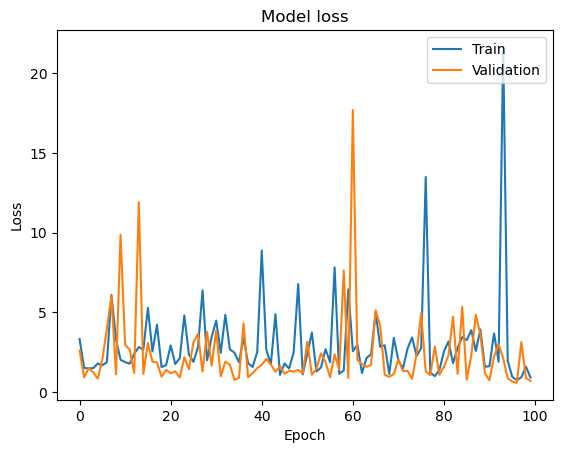

In [41]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=22, validation_split=0.1, verbose=0)

# Plot training & validation loss values

# plt.plot(): This function from Matplotlib plots the values given to it.
# Here, it's used to plot the training loss values stored in history.history['loss'].

# history.history['loss']: This retrieves the record of loss values at the end of each epoch on the training set.

# label='Train': This labels the plot data as "Train", which will be used in the legend.

plt.plot(history.history['loss'], label='Train')

plt.plot(history.history['val_loss'], label='Validation')

plt.title('Model loss')

plt.ylabel('Loss')

plt.xlabel('Epoch')

plt.legend(loc='upper right')

plt.show()

After adjusting the Batch Size to 22, the model seems to have learned effectively from the training data and generalizes well to the validation set.

The flat and stable lines for both training and validation loss imply that the model is stable and there are no signs of divergence or erratic changes in loss, which can sometimes occur due to too high of a learning rate or other instability in the training process.

The performance doesn't improve much after the initial epochs, which could mean that either the model has reached its capacity for this particular problem or that the chosen architecture and hyperparameters are adequate and do not require further complex adjustments.

## 2. Scatter Plot of Predictions vs. True Values

A scatter plot comparing the model's predictions against the true values can provide insight into how well the model is performing across the dataset.

**Purpose of This Plot:**

The scatter plot is an important diagnostic tool. If the model's predictions are perfect, all points would lie on the dashed line (the line of perfect fit).

Deviations from this line indicate prediction errors. The pattern of points can reveal biases and the variance of the predictions.

**For example:**

If points are evenly distributed around the line of perfect fit, the model has good predictive performance.

If the points form a pattern or systematic deviations from the line, it may indicate model biases or areas where the model could be improved.

The closer the points cluster to the line, the better the model is at predicting the true values.

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step


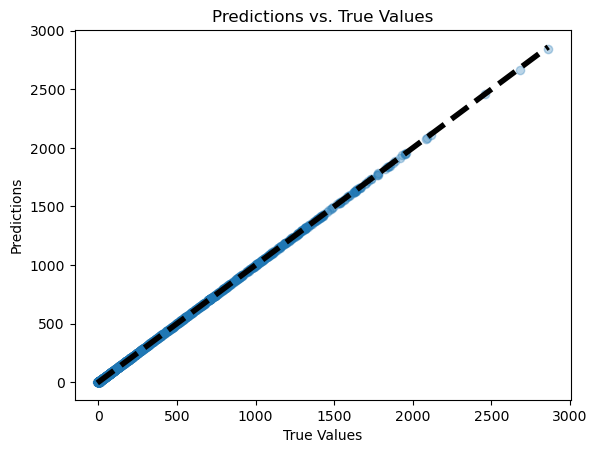

In [36]:
# This uses the trained model to make predictions based on the scaled features
# from the test set.

# .flatten(): Since model.predict() returns predictions in a 2D array
# (even for single output regression problems),
# .flatten() is used to convert this array into a 1D array for easier handling and plotting.

y_pred = model.predict(X_test_scaled).flatten()


# This function creates a scatter plot with the true values (y_test) on the x-axis
# and the predicted values (y_pred) on the y-axis.
# alpha=0.3: This sets the transparency of the points.
#An alpha value of 0.3 means that the points are 30% opaque,
# which helps in visualizing the density of points, especially if there's a large number of overlapping points.

plt.scatter(y_test, y_pred, alpha=0.3)


# Adds a title to the scatter plot.

plt.title('Predictions vs. True Values')

# These functions label the x-axis and y-axis, respectively,
# making the plot easier to understand.

plt.xlabel('True Values')
plt.ylabel('Predictions')

# This function is used here to draw the line of perfect predictions,
# where the predicted values exactly match the true values.
# [y_test.min(), y_test.max()]: This creates a list with the minimum and maximum values of the true values,
# defining the start and end points of the line.
# k--: The 'k' denotes the color black, and the '--' specifies that the line style is dashed.
# lw=4: Sets the line width to 4, making the line easily visible.
    
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

# Displays the final figure with the scatter plot.

plt.show()

The model appears to be performing well across the entire range of the data, with predictions that align closely with the true values. This indicates a well-fitted model that generalizes effectively to unseen data.

## 3. Distribution of Prediction Errors

Analyzing the distribution of prediction errors (residuals) can help determine if there are systematic errors in the model's predictions.

**Purpose of This Plot:**

The histogram of prediction errors is a diagnostic tool that allows to see if there's a pattern to the errors your model is making.

In an ideal situation, the errors should be normally distributed around zero, indicating that the model is equally likely to overestimate or underestimate the efficiency.

**For example:**

**Centered around zero:** On average, the model's predictions are accurate.

**Skewed to the left or right:** A skew in the histogram indicates a systematic bias in the predictions.

**Multiple peaks:** This could suggest that the model is performing differently on different segments of the dataset, which might warrant further investigation.

By analyzing the distribution of errors, it is posible to get an idea of the model's accuracy and whether any biases might be affecting its predictions.

If the distribution is not centered around zero or shows a non-random pattern, it might suggest that the model could be improved, perhaps by re-examining feature selection, further preprocessing of the data, or tweaking the model architecture.

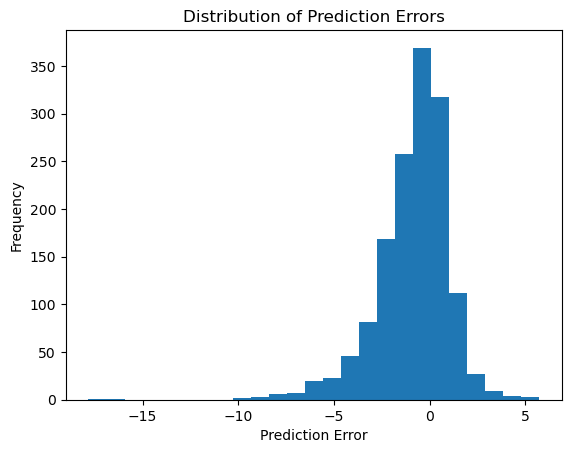

In [37]:
# Calculates the prediction errors by subtracting the true values (y_test)
# from the predicted values (y_pred). If the prediction is perfect, the error would be zero.
# Positive values indicate overestimations, and negative values indicate underestimations by the model.

errors = y_pred - y_test

# This function creates a histogram to visualize the distribution of the prediction errors.
# errors: The first argument is the array of prediction errors to be plotted.
# bins=25: This specifies the number of bins to use for the histogram.
# The choice of 25 bins is arbitrary and can be adjusted to provide the desired granularity of the distribution.

plt.hist(errors, bins=25)

# Sets the title of the histogram, which in this case indicates that we are looking at the distribution
# of prediction errors.

plt.title('Distribution of Prediction Errors')

# These functions label the x-axis and y-axis, respectively.
# The x-axis represents the prediction error values, and the y-axis represents the frequency of these errors.

plt.xlabel('Prediction Error')
plt.ylabel('Frequency')

# Displays the histogram.

plt.show()

Overall, the model seems to be decently calibrated, with errors centered around zero. The spread and skewness could point out specific areas for model improvement, which could involve further examining instances with large errors to understand their potential causes and adjusting the model or features accordingly.

## 4. Model Performance Metrics

Besides visualizing the results, computing performance metrics can provide quantitative insight into the model's accuracy. For regression tasks, common metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

**Purpose of Each Metric:**

**MAE (Mean Absolute Error):** It's a robust measure of how accurately the model is predicting the target. It's particularly useful when you want to know the size of the error without considering its direction.

**MSE (Mean Squared Error):** It's more sensitive to outliers than MAE because it squares the prediction errors before averaging them. High errors have more influence on the MSE, so it's useful when you want to penalize larger errors.

**R2 (R-squared):** It represents the proportion of variance for the dependent variable that's explained by the independent variables in the model. In other words, it shows the strength of the relationship between your model and the dependent variable on a 0 - 1 scale.

In [38]:
# This function computes the MAE, which measures the average magnitude of the errors in a set of predictions,
# without considering their direction.
# It’s the average over the test sample of the absolute differences between prediction and
# actual observation where all individual differences have equal weight.

# mae: The variable that stores the computed MAE value.

mae = mean_absolute_error(y_test, y_pred)

# mean_squared_error(): This function calculates the MSE,
# which measures the average of the squares of the errors—that is,
# the average squared difference between the estimated values and the actual value.

# mse: The variable that stores the computed MSE value.


mse = mean_squared_error(y_test, y_pred)

# This function computes the coefficient of determination, commonly known as R-squared.
# It’s a statistical measure of how well the regression predictions approximate the real data points.
# An R-squared of 1 indicates that the regression predictions perfectly fit the data.

# r2: The variable that stores the computed R-squared value.

r2 = r2_score(y_test, y_pred)

# print statements at the end output the computed metrics, formatted to two decimal places:

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 1.48
Mean Squared Error (MSE): 4.67
R-squared (R2): 1.00


It looks like there are no problems with the model; the metrics point to great model success.

But problems like data leakage, which uses wrong information from outside the training dataset to make predictions, can sometimes show that the measures aren't so good.

I think it would be better to double-check the model's training and evaluation process to confirm these results are accurate and truly reflective of the model's predictive power.

# Save the trained Keras model

In [39]:
# model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# The .h5 extension indicates that the model should be saved to HDF5.

# Save the entire model to a keras file.

model.save('new_nba_predictions_model.keras')

# will continue in PART 3